<a href="https://colab.research.google.com/github/silver2810/data-science/blob/master/Segmentation_Departamento_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 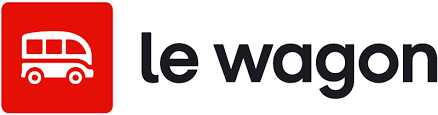

In [ ]:
%pwd

'/content'

In [ ]:
# Diego
from google.colab import auth
from google.colab import drive
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import sys

# get credentials
auth.authenticate_user()
#connect to drive and bigquery
drive.mount('/content/drive')
query = 'SELECT * FROM `da-bootcamp-with-football.departamento_marketing_pro_fans.daco_campaigns`'
df = pd.read_gbq(query, project_id="advance-stratum-405017")

%cd /content
from graph_funcs import count_plot, multi_count_plot

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/LeWagon


# Limpieza de datos

Limpiando los datos:
- eliminar valores
- revisar tipos de datos

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) # transform string to date format
df = df.drop('int64_field_0', axis=1) # Delete Unknown column
df.rename(columns={'Response':'AcceptedCmp6'}, inplace=True)
df

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,TotalPreferentialParking,TotalFood,TotalVipPass,TotalFastPass,TotalDrinks,TotalFamilyPack
0,3009,1971,PhD,Widow,143340.0,0,0,2022-07-09,8,1,...,0,1,0,1,256,32,2924,0,0,480
1,3968,1979,2n Cycle,Divorced,131412.0,0,0,2022-06-28,77,1,...,0,1,0,1,258,20,1836,15,0,387
2,5331,1986,Graduation,Married,149970.0,0,0,2021-09-11,8,1,...,0,0,0,0,1796,102,1174,741,0,258
3,6605,1953,PhD,Divorced,111228.0,0,0,2022-11-27,85,1,...,0,0,0,0,262,26,1008,10,0,78
4,607,1964,2n Cycle,Divorced,83538.0,0,1,2022-02-13,31,6,...,0,0,0,0,262,58,604,96,0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,9589,1957,PhD,Widow,164064.0,0,0,2023-04-05,54,0,...,0,0,0,0,754,388,664,447,250,171
2236,5883,1981,Graduation,Married,155962.0,1,0,2022-05-26,78,3,...,0,0,0,0,408,240,276,48,252,180
2237,2535,1987,Master,Married,176194.0,1,0,2021-08-18,24,1,...,1,0,0,1,960,0,326,0,252,225
2238,5250,1952,Master,Widow,NaN,0,0,2022-10-30,75,1,...,0,0,0,1,980,252,1064,492,252,378


Eliminación de outliers por edad

In [ ]:
df = df[df['YearBirth'] >= 1940]
df

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,TotalPreferentialParking,TotalFood,TotalVipPass,TotalFastPass,TotalDrinks,TotalFamilyPack
0,3009,1971,PhD,Widow,143340.0,0,0,2022-07-09,8,1,...,0,1,0,1,256,32,2924,0,0,480
1,3968,1979,2n Cycle,Divorced,131412.0,0,0,2022-06-28,77,1,...,0,1,0,1,258,20,1836,15,0,387
2,5331,1986,Graduation,Married,149970.0,0,0,2021-09-11,8,1,...,0,0,0,0,1796,102,1174,741,0,258
3,6605,1953,PhD,Divorced,111228.0,0,0,2022-11-27,85,1,...,0,0,0,0,262,26,1008,10,0,78
4,607,1964,2n Cycle,Divorced,83538.0,0,1,2022-02-13,31,6,...,0,0,0,0,262,58,604,96,0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,9589,1957,PhD,Widow,164064.0,0,0,2023-04-05,54,0,...,0,0,0,0,754,388,664,447,250,171
2236,5883,1981,Graduation,Married,155962.0,1,0,2022-05-26,78,3,...,0,0,0,0,408,240,276,48,252,180
2237,2535,1987,Master,Married,176194.0,1,0,2021-08-18,24,1,...,1,0,0,1,960,0,326,0,252,225
2238,5250,1952,Master,Widow,NaN,0,0,2022-10-30,75,1,...,0,0,0,1,980,252,1064,492,252,378


In [ ]:
df.head(3)

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,TotalPreferentialParking,TotalFood,TotalVipPass,TotalFastPass,TotalDrinks,TotalFamilyPack
0,3009,1971,PhD,Widow,143340.0,0,0,2022-07-09,8,1,...,0,1,0,1,256,32,2924,0,0,480
1,3968,1979,2n Cycle,Divorced,131412.0,0,0,2022-06-28,77,1,...,0,1,0,1,258,20,1836,15,0,387
2,5331,1986,Graduation,Married,149970.0,0,0,2021-09-11,8,1,...,0,0,0,0,1796,102,1174,741,0,258


## Enriquecimiento de datos

Agrupación de consumidores por grupo de edad (década)

In [ ]:
df['AgeGroup'] = sorted((df['YearBirth']/10).astype(int)*10)
df['AgeGroup'].unique()

<ipython-input-55-60c60f355373>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([1940, 1950, 1960, 1970, 1980, 1990, 2000])

Suma del Revenue de todas las categorías

In [ ]:
df['TotalRevenue'] = df[['TotalPreferentialParking', 'TotalFood',
       'TotalVipPass', 'TotalFastPass', 'TotalDrinks', 'TotalFamilyPack']].sum(axis=1)
#df['TotalRevenue']

<ipython-input-56-fd2a1f77f997>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Segmentación de fecha de consumo por cuartiles

In [ ]:
df['QuarterYear'] = df['Dt_Customer'].dt.to_period('Q')

# Display the DataFrame with the new 'QuarterYear' column
df['QuarterYear'].unique()

<ipython-input-57-d63b5dd7601a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<PeriodArray>
['2022Q3', '2022Q2', '2021Q3', '2022Q4', '2022Q1', '2023Q2', '2021Q4',
 '2023Q1']
Length: 8, dtype: period[Q-DEC]

#### Añadir Columna `Children` Para definir los clientes que tienen hijos independientemente de su edad

In [ ]:
df.iloc[:, 5:7].value_counts() # numero de clientes con hijos

Kidhome  Teenhome
0        0           637
         1           624
1        0           502
         1           374
2        1            31
0        2            30
1        2            22
2        0            17
dtype: int64

In [ ]:
df['children'] = df.apply(lambda row: 1 if (row['Kidhome'] + row['Teenhome'] > 0) else 0, axis=1) # Si tiene algún hijo 1, si no tiene ninguno 0

<ipython-input-59-1ad289fbaa36>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['children'].value_counts() # revisar resultado

1    1600
0     637
Name: children, dtype: int64

### Tabla de correlación

<ipython-input-61-b601c7e992ea>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



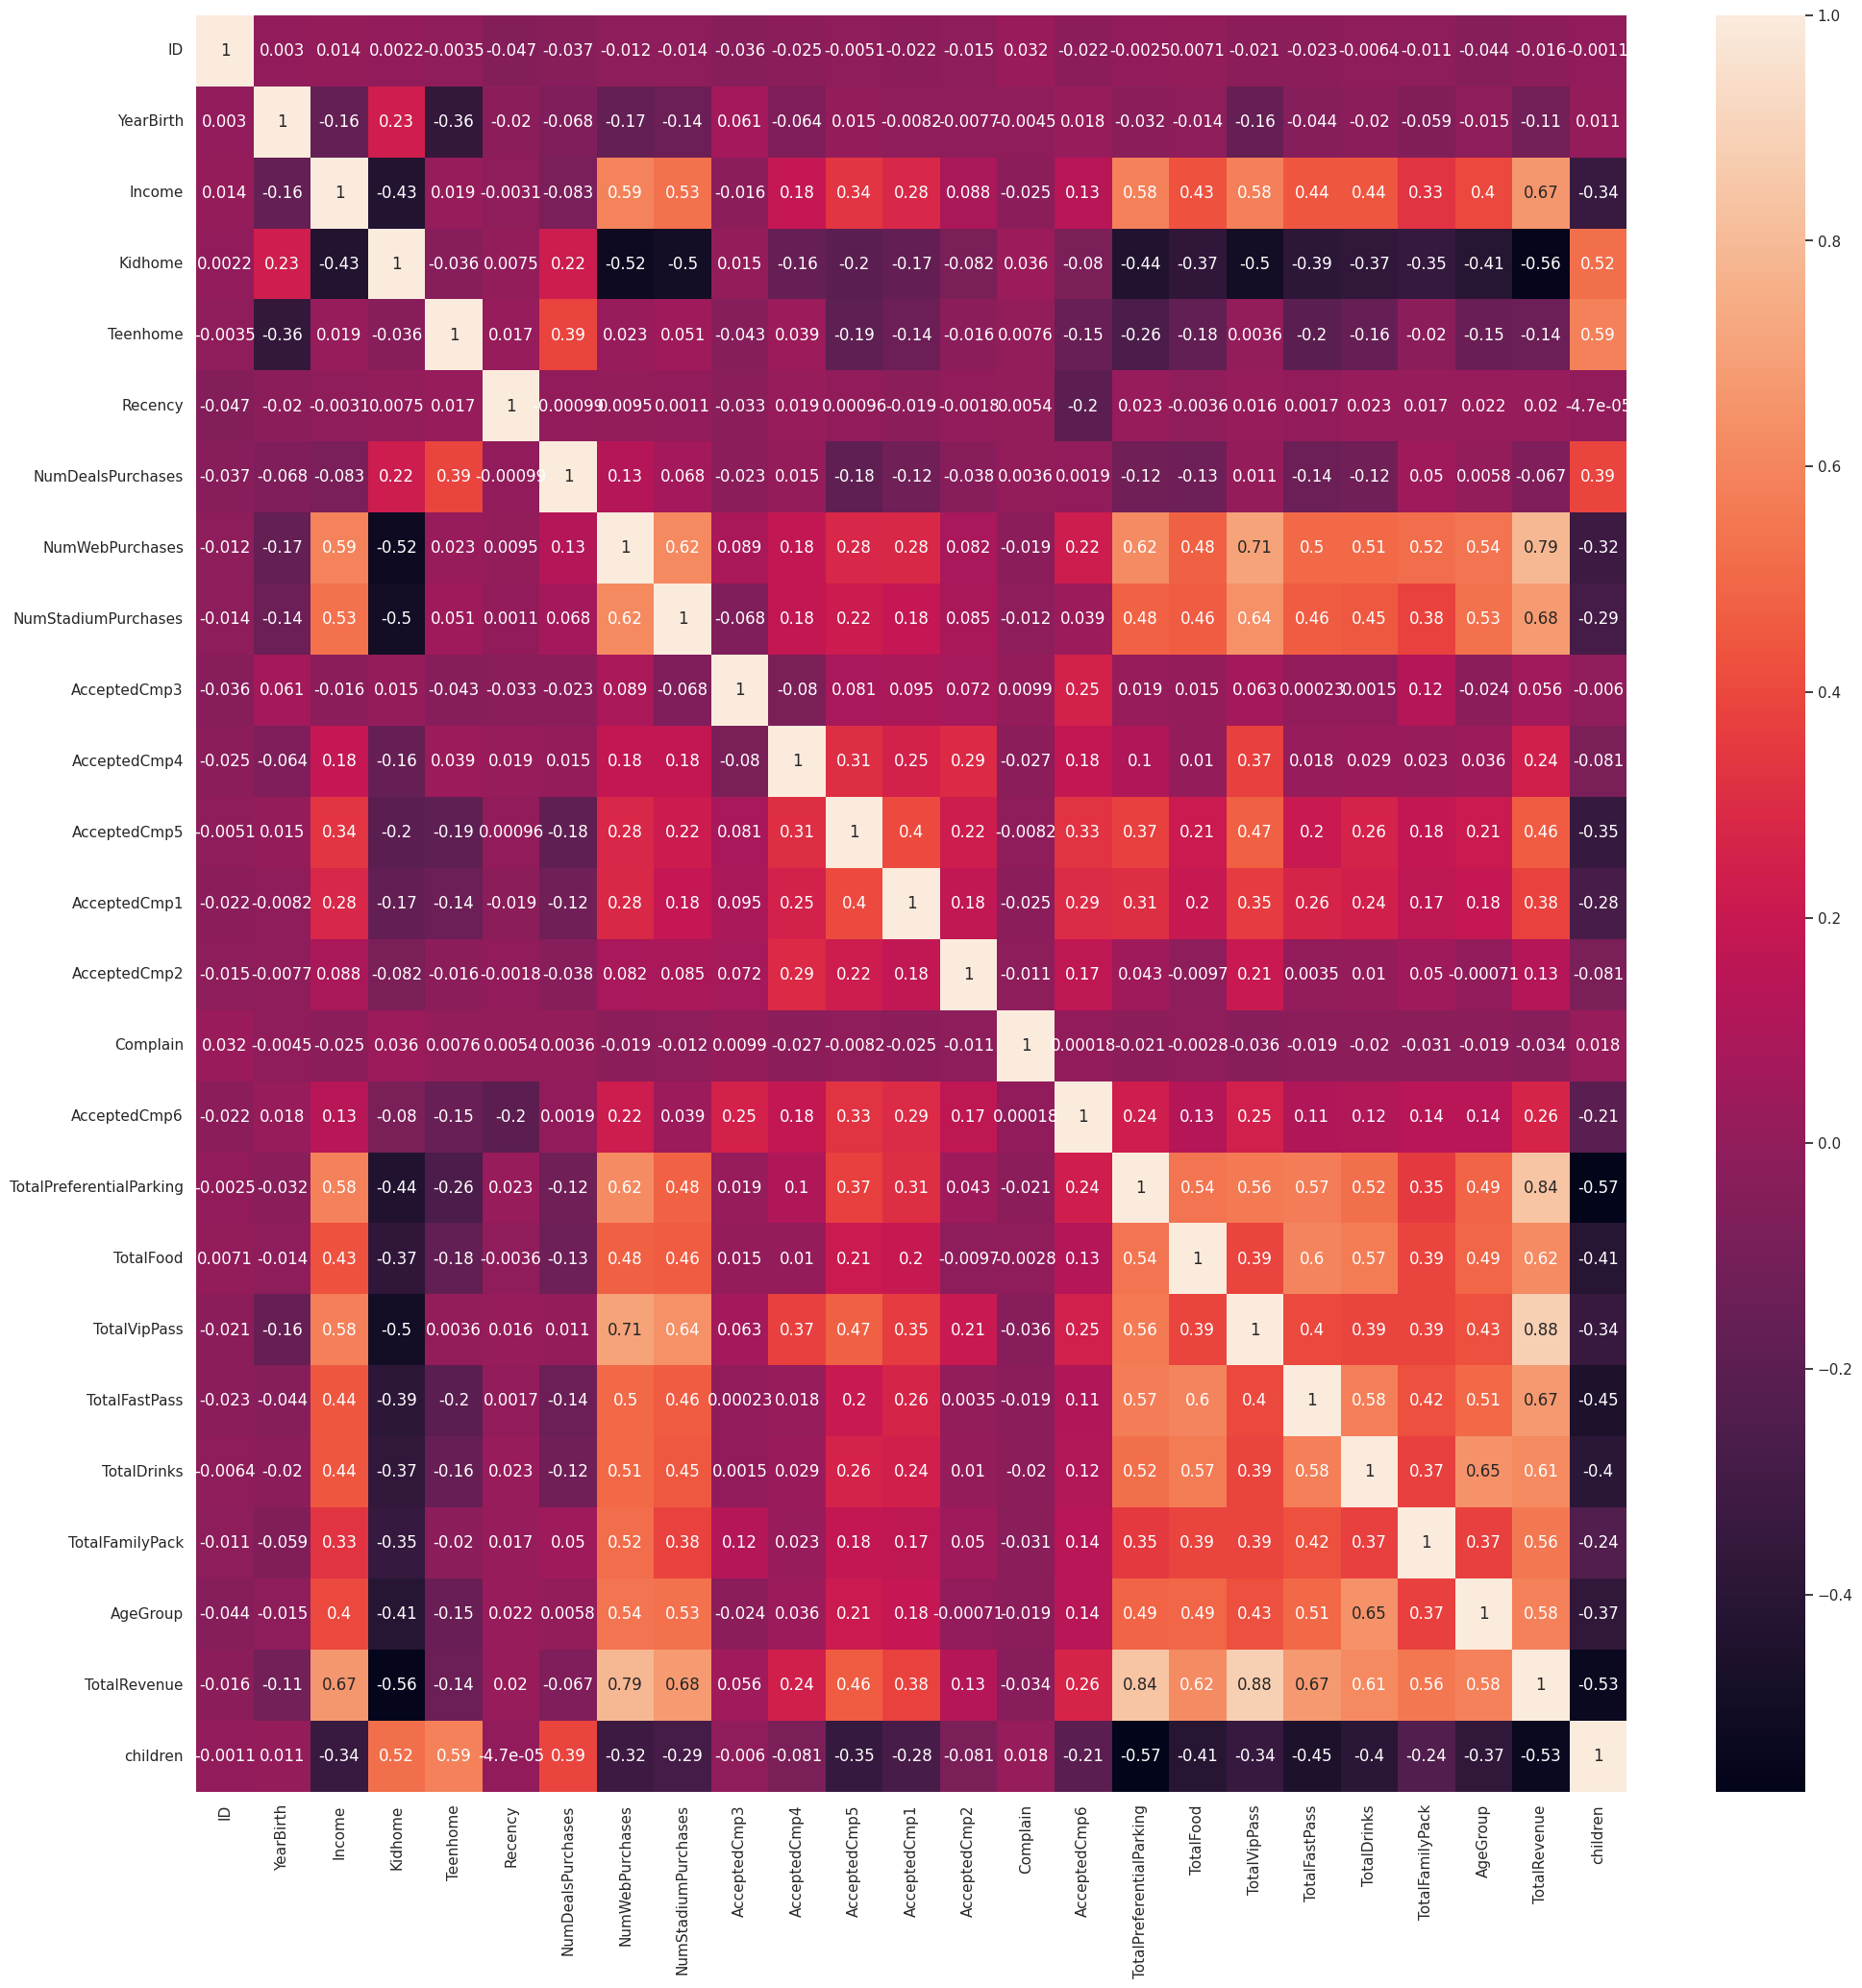

In [ ]:
plt.figure(figsize=(24, 24))
sns.heatmap(df.corr(), annot=True)

plt.show()

# YearBirth Exploration

Distribución por edad de los clientes

In [ ]:
#sns.histplot(df, x='YearBirth', bins=15)
sorted_value_counts = df['YearBirth'].value_counts().sort_index(ascending=True)#nunique()#.value_counts()#unique()
fig = px.histogram(df, x="YearBirth", marginal="box")
fig.show()

In [ ]:
df['YearBirth'].min()
df['YearBirth'].max()
int(2023 - df['YearBirth'].mean())

45

La edad promedio de los consumidores de Daco FC es de 45 años (43 a 45 teniendo en cuenta la ventana de 2 años de los datos)

In [ ]:
# Información del cliente con mayor Income de Daco FC
df[df['Income'] > 1000000]

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,TotalPreferentialParking,TotalFood,TotalVipPass,TotalFastPass,TotalDrinks,TotalFamilyPack,AgeGroup,TotalRevenue,QuarterYear,children
543,9432,1986,Graduation,Together,1333332.0,1,0,2022-06-02,23,4,...,25,28,20,10,2,36,1960,121.0,2022Q2,1


In [ ]:
df

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,TotalPreferentialParking,TotalFood,TotalVipPass,TotalFastPass,TotalDrinks,TotalFamilyPack,AgeGroup,TotalRevenue,QuarterYear,children
0,3009,1971,PhD,Widow,143340.0,0,0,2022-07-09,8,1,...,256,32,2924,0,0,480,1940,3692.0,2022Q3,0
1,3968,1979,2n Cycle,Divorced,131412.0,0,0,2022-06-28,77,1,...,258,20,1836,15,0,387,1950,2516.0,2022Q2,0
2,5331,1986,Graduation,Married,149970.0,0,0,2021-09-11,8,1,...,1796,102,1174,741,0,258,1950,4071.0,2021Q3,0
3,6605,1953,PhD,Divorced,111228.0,0,0,2022-11-27,85,1,...,262,26,1008,10,0,78,1950,1384.0,2022Q4,0
4,607,1964,2n Cycle,Divorced,83538.0,0,1,2022-02-13,31,6,...,262,58,604,96,0,81,1950,1101.0,2022Q1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,9589,1957,PhD,Widow,164064.0,0,0,2023-04-05,54,0,...,754,388,664,447,250,171,2000,2674.0,2023Q2,0
2236,5883,1981,Graduation,Married,155962.0,1,0,2022-05-26,78,3,...,408,240,276,48,252,180,2000,1404.0,2022Q2,1
2237,2535,1987,Master,Married,176194.0,1,0,2021-08-18,24,1,...,960,0,326,0,252,225,2000,1763.0,2021Q3,1
2238,5250,1952,Master,Widow,NaN,0,0,2022-10-30,75,1,...,980,252,1064,492,252,378,2000,3418.0,2022Q4,0


In [ ]:
df.columns

Index(['ID', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumStadiumPurchases', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'AcceptedCmp6', 'TotalPreferentialParking', 'TotalFood',
       'TotalVipPass', 'TotalFastPass', 'TotalDrinks', 'TotalFamilyPack',
       'AgeGroup', 'TotalRevenue', 'QuarterYear', 'children'],
      dtype='object')

In [ ]:
pivot_df = df.pivot_table(index='QuarterYear', values=['ID'], columns='AgeGroup', aggfunc='count', sort=True, fill_value=0)
pivot_df['Max Value'] = pivot_df.max(axis=1)
pivot_df

ID                               Max Value
AgeGroup    1940 1950 1960 1970 1980 1990 2000          
QuarterYear                                             
2021Q3         0    4   32   49   79   47    8        79
2021Q4         0    7   72   58   95   40    3        95
2022Q1         0    6   58   76  106   55    8       106
2022Q2         0   24   50   68   92   43    7        92
2022Q3         1   19   75   63   92   43    2        92
2022Q4         0   15   56   83   93   46    6        93
2023Q1         0   29   68   77   64   34    5        77
2023Q2         0   31   69   60   81   34    4        81

In [ ]:
#'TotalPreferentialParking', 'TotalFood', 'TotalVipPass', 'TotalFastPass', 'TotalDrinks', 'TotalFamilyPack'
pivot_df = df.pivot_table(index='QuarterYear', values=['TotalPreferentialParking'], columns='AgeGroup', aggfunc='mean', sort=True, fill_value=0)
pivot_df['Max Value'] = pivot_df.max(axis=1)
pivot_df

TotalPreferentialParking                                     \
AgeGroup                        1940       1950        1960        1970   
QuarterYear                                                               
2021Q3                           0.0     460.25   176.03125  256.183673   
2021Q4                           0.0       15.0       186.0  172.672414   
2022Q1                           0.0  56.166667  213.068966   81.842105   
2022Q2                           0.0       35.5      315.74  134.044118   
2022Q3                         256.0  41.526316   59.226667   70.746032   
2022Q4                           0.0  31.466667   85.178571   80.204819   
2023Q1                           0.0       15.0  120.102941  126.155844   
2023Q2                           0.0  23.096774   60.376812   94.533333   

                                                   Max Value  
AgeGroup           1980        1990        2000               
QuarterYear                                                   
2021Q3       447.253165  881.148936      871.25   881.148936  
2021Q4       444.768421     562.375       934.0   934.000000  
2022Q1       448.443396  627.018182      836.25   836.250000  
2022Q2       450.054348  773.627907  680.571429   773.627907  
2022Q3       393.108696  678.046512       631.0   678.046512  
2022Q4       522.021505  786.826087  869.666667   869.666667  
2023Q1        465.21875  759.705882      1068.4  1068.400000  
2023Q2       477.765432  808.823529       589.5   808.823529

People born between 1980 and 1989 spend the most on Vip Pass (In total)


In [ ]:
time_df = df[['Dt_Customer', 'TotalRevenue']]
time_df = time_df.sort_values(by='Dt_Customer').set_index('Dt_Customer')
fig = px.line(time_df)#, x='Dt_Customer', y='TotalRevenue')
fig.show()

# Education Exploration

In [ ]:
import plotly.express as px
education_order = df['Education'].value_counts().index.tolist()
fig = px.histogram(df, x='Education', color='Education', title='Education type grouping', category_orders={'Education': education_order})
fig.show()

In [ ]:
fig = px.histogram(df, x='Education', color='MaritalStatus', facet_col='Kidhome', barmode='group')
fig.update_layout(
    title='Education vs Kidhome by Marital Status',
    xaxis_title='Education',
    yaxis_title='Count',
)
fig.show()

El grupo mas numeroso esta representado por personas que registran un nivel de educación universitario y además registran ser casados y sin hijos. En segundo lugar los casados con un solo hijo y graduados de la universidad. El tercer grupo más numero lo conforman personas que completaron la universidad y ademas viven con una pareja pero sin hijos.

In [ ]:
fig = px.histogram(df, x='Education', color='MaritalStatus', facet_col='Teenhome', barmode='group')
fig.update_layout(
    title='Education vs Teenhome by Marital Status',
    xaxis_title='Education',
    yaxis_title='Count',
)
fig.show()

In [ ]:
fig = px.histogram(df, x='MaritalStatus', y='Income', color='Education', facet_col='Kidhome', facet_row='Teenhome', barmode='group')
fig.update_layout(
    title='Marital status vs Income by Education and stacked by Teenhome',
    xaxis_title='Education',
    yaxis_title='Income',
    height=1000,
    width=1000
)
fig.show()

In [ ]:
ms_vs_edu = df.pivot_table(index='Education', columns='MaritalStatus', values='Income')
ms_vs_edu

MaritalStatus,Divorced,Married,Single,Together,Widow
Education,,,,,
2n Cycle,99949.818182,92402.200000,106976.000000,89472.821429,102784.400000
Basic,19096.000000,43921.000000,36477.333333,42480.142857,44246.000000
Graduation,109052.084034,101600.517483,102731.266129,111516.961404,109953.314286
Master,100663.891892,106572.057971,107574.285714,104218.019608,116803.090909
PhD,106193.230769,116276.063158,106079.333333,111604.747826,120576.166667


In [ ]:
ms_vs_edu.max().sort_values(ascending=False)

MaritalStatus
Widow       120576.166667
Married     116276.063158
Together    111604.747826
Divorced    109052.084034
Single      107574.285714
dtype: float64

In [ ]:
ms_vs_edu_purchases = df.pivot_table(index='Education', columns='MaritalStatus', values='NumDealsPurchases')
ms_vs_edu_purchases

MaritalStatus,Divorced,Married,Single,Together,Widow
Education,,,,,
2n Cycle,2.409091,2.123457,1.833333,2.684211,2.0
Basic,2.0,1.8,2.222222,1.285714,1.0
Graduation,2.302521,2.34642,2.248031,2.311189,2.314286
Master,2.486486,2.536232,1.896104,2.622642,2.666667
PhD,2.75,2.567708,2.217822,2.043103,2.333333


In [ ]:
ms_vs_edu_purchases_web = df.pivot_table(index='Education', columns='MaritalStatus', values='NumStadiumPurchases')
ms_vs_edu_purchases_web

MaritalStatus,Divorced,Married,Single,Together,Widow
Education,,,,,
2n Cycle,6.181818,5.432099,5.333333,5.421053,7.4
Basic,3.0,3.25,2.722222,2.428571,3.0
Graduation,5.857143,5.875289,5.65748,5.895105,5.885714
Master,5.486486,5.905797,6.25974,5.660377,6.833333
PhD,5.942308,6.203125,5.762376,5.982759,6.916667


# MaritalStatus Exploration

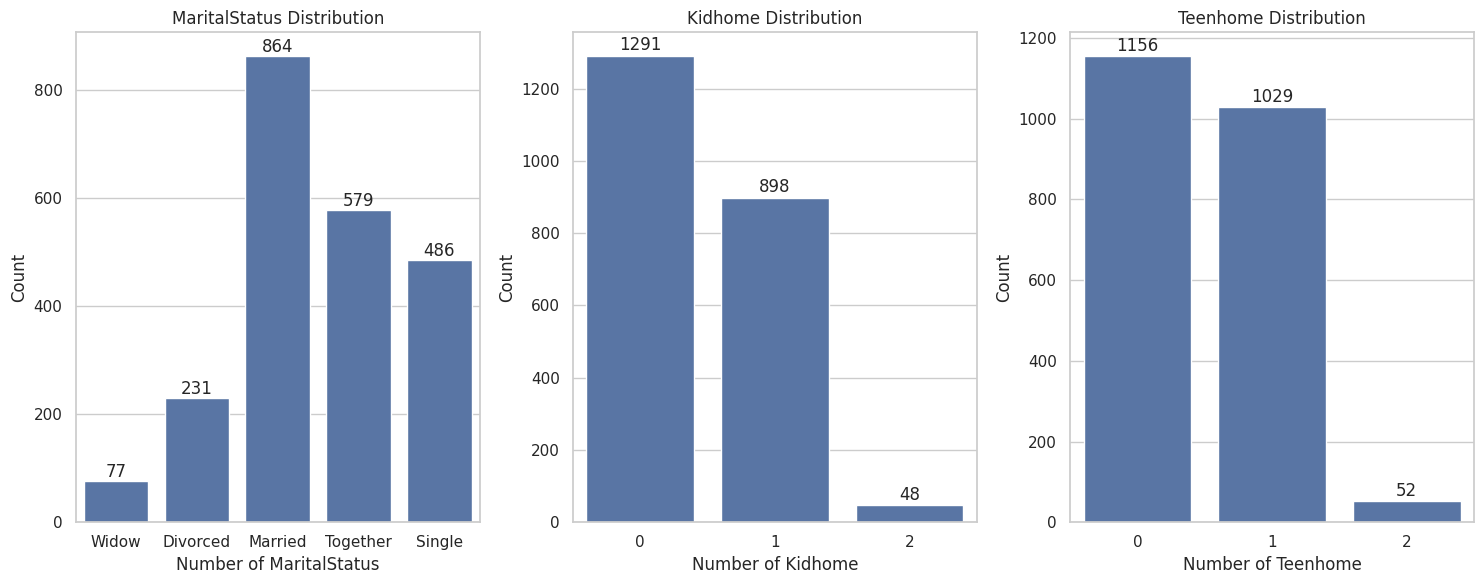

In [ ]:
multi_count_plot(df, ['MaritalStatus', 'Kidhome', 'Teenhome']) # Conteo de los estados civiles, para revisar la proporción de los clientes

### Distribución de la población
- La mayoría de los clientes se encuentran casados % o están en pareja %
- La mayoría de los cliente no tiene hijos o solamente tienen un hijo
- La distribución de adolescentes es parecida a la de niños pequeños

### Relación del estado civil con las otras variables demográficas
- Ingresos
- Edad
- Educación

In [ ]:
df_marital = df.groupby(['MaritalStatus','Education']).agg({'Education': 'count', 'Income': 'sum'}).sort_values(['MaritalStatus','Income']) # Agrupación por EstadoCivil y Educación, para mostrar el total de ingresos
df_marital['Income_mean'] = df.groupby(['MaritalStatus', 'Education'])['Income'].mean().apply(lambda x: '{:,.2f}'.format(x))  # Crear nueva columna para calcular el promedio de ingresos de cada grupo
df_marital = df_marital.rename(columns={'Education': 'Count'}) # Cambiar nombre de la columna a Count
df_marital['Income'] = df_marital['Income'].apply(lambda x: '{:,.0f}'.format(x)) # cambiar el formato de la columna income para mostrar la coma en el millar
df_marital.reset_index(inplace=True)

In [ ]:
df_marital.head()#.columns

,MaritalStatus,Education,Count,Income,Income_mean
0,Divorced,Basic,1,"19,096","19,096.00"
1,Divorced,2n Cycle,22,"2,198,896","99,949.82"
2,Divorced,Master,37,"3,724,564","100,663.89"
3,Divorced,PhD,52,"5,522,048","106,193.23"
4,Divorced,Graduation,119,"12,977,198","109,052.08"


In [ ]:
# Assuming df_marital is your DataFrame with mean income and count information
fig_scatter = px.scatter(df_marital, x='Income_mean', y='Count', color='Education', facet_col='MaritalStatus',
                         title='Scatter Plot: Mean Income vs Count of Education Levels by Marital Status')

fig_scatter.show()

- No podemos ver una diferencia significativa entre el estado civil del usuario y su nivel de ingresos
- Podemos ver una diferencia de ingresos en el nivel de estudios básico, siendo este menor.

## Análisis Diagnóstico
- Cuanta plata gasta cada estado civil
- Cuál es la respuesta con respecto a las campañas?
- Hay preferencias en las campañas, cual es la moda?
- De donde provienen la mayor parte de las quejas?
- análisis de número de compras, total, promedio, agrupación por estado civil

In [ ]:
marital_purchase = df.groupby('MaritalStatus').agg({'MaritalStatus':'count',
                                                    'NumDealsPurchases': 'sum',
                                                    'NumWebPurchases':'sum',
                                                    'NumStadiumPurchases':'sum',
                                                    'TotalPreferentialParking':'sum',
                                                    'TotalFood':'sum',
                                                    'TotalVipPass':'sum',
                                                    'TotalFastPass':'sum',
                                                    'TotalDrinks':'sum',
                                                    'TotalFamilyPack':'sum',
                                                    'Complain':'sum'
                                                    }) # Agrupamiento y suma de las variables de consumo

In [ ]:
marital_purchase_mean = df.groupby('MaritalStatus').agg({'MaritalStatus':'count',
                                                    'NumDealsPurchases': 'mean',
                                                    'NumWebPurchases':'mean',
                                                    'NumStadiumPurchases':'mean',
                                                    'TotalPreferentialParking':'mean',
                                                    'TotalFood':'mean',
                                                    'TotalVipPass':'mean',
                                                    'TotalFastPass':'mean',
                                                    'TotalDrinks':'mean',
                                                    'TotalFamilyPack':'mean',
                                                    'Complain':'mean'
                                                    })# Agrupamiento y promedio de las variables de consumo

In [ ]:
marital_campaigns = df.groupby('MaritalStatus').agg({'AcceptedCmp1':'sum',
                                                     'AcceptedCmp2':'sum',
                                                     'AcceptedCmp3':'sum',
                                                     'AcceptedCmp4':'sum',
                                                     'AcceptedCmp5':'sum',
                                                     'AcceptedCmp6':'sum',
                                                     }) # Agrupamiento por Estado Civil y conteo de la aceptación de las campañas

In [ ]:
marital_purchase

,MaritalStatus,NumDealsPurchases,NumWebPurchases,NumStadiumPurchases,TotalPreferentialParking,TotalFood,TotalVipPass,TotalFastPass,TotalDrinks,TotalFamilyPack,Complain
MaritalStatus,,,,,,,,,,,
Divorced,231,564,1617,1348,69518,12714,150695,23654,12436,32059,1
Married,864,2067,5800,5055,276643,44470,517236,89210,46140,110191,8
Single,486,1047,3161,2742,175918,26136,280849,54924,26348,64291,6
Together,579,1347,3909,3323,193192,29118,354471,65703,30174,73788,5
Widow,77,180,612,494,29110,5096,56889,11753,6008,13048,0


In [ ]:
marital_purchase_mean

,MaritalStatus,NumDealsPurchases,NumWebPurchases,NumStadiumPurchases,TotalPreferentialParking,TotalFood,TotalVipPass,TotalFastPass,TotalDrinks,TotalFamilyPack,Complain
MaritalStatus,,,,,,,,,,,
Divorced,231,2.441558,7.0,5.835498,300.943723,55.038961,652.359307,102.398268,53.835498,138.78355,0.004329
Married,864,2.392361,6.712963,5.850694,320.188657,51.469907,598.652778,103.252315,53.402778,127.53588,0.009259
Single,486,2.154321,6.504115,5.641975,361.971193,53.777778,577.878601,113.012346,54.213992,132.286008,0.012346
Together,579,2.326425,6.751295,5.739206,333.66494,50.290155,612.212435,113.476684,52.11399,127.440415,0.008636
Widow,77,2.337662,7.948052,6.415584,378.051948,66.181818,738.818182,152.636364,78.025974,169.454545,0.0


In [ ]:
marital_campaigns

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6
MaritalStatus,,,,,,
Divorced,12,5,20,18,13,48
Married,63,7,63,63,66,98
Single,32,5,39,33,32,109
Together,32,12,37,43,43,60
Widow,5,1,4,10,8,19


In [ ]:
px.histogram(df, x='MaritalStatus', y=marital_campaigns.columns) #Conteo de la aceptación de campañas por cada

# Income Exploration


In [ ]:
fig = px.histogram(df, x="Income", marginal="box")
fig.show()

*   Los ingresos de los clientes van desde 3.460 hasta 227.468. Existe un outlier con 1'333.332
*   Los ingresos promedio son $102.763


*   El
*   Elemento de lista

In [ ]:
df["Income"].max()

1333332.0

In [ ]:
fig_funnel= px.funnel(df.groupby('MaritalStatus')['Income'].mean(),x="Income")
fig_funnel.show()

*   Los clientes con estado civil "Viudo" son el grupo de mayor ingreso promedio
*   Elemento de lista

In [ ]:
fig_kidhome = px.bar(df.groupby('Kidhome')['Income'].mean(),x='Income',barmode='group')
fig_kidhome.show()

In [ ]:
fig_teenhome = px.bar(df.groupby('Teenhome')['Income'].mean(),x='Income',barmode='group')
fig_teenhome.show()

In [ ]:
fig_year = px.bar(df.groupby('YearBirth')['Income'].mean(), x="Income")
fig_year.show()

# DataFrame para PowerBI

In [ ]:
df.head(2)#.columns

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,TotalPreferentialParking,TotalFood,TotalVipPass,TotalFastPass,TotalDrinks,TotalFamilyPack,AgeGroup,TotalRevenue,QuarterYear,children
0,3009,1971,PhD,Widow,143340.0,0,0,2022-07-09,8,1,...,256,32,2924,0,0,480,1940,3692.0,2022Q3,0
1,3968,1979,2n Cycle,Divorced,131412.0,0,0,2022-06-28,77,1,...,258,20,1836,15,0,387,1950,2516.0,2022Q2,0
2,5331,1986,Graduation,Married,149970.0,0,0,2021-09-11,8,1,...,1796,102,1174,741,0,258,1950,4071.0,2021Q3,0
3,6605,1953,PhD,Divorced,111228.0,0,0,2022-11-27,85,1,...,262,26,1008,10,0,78,1950,1384.0,2022Q4,0
4,607,1964,2n Cycle,Divorced,83538.0,0,1,2022-02-13,31,6,...,262,58,604,96,0,81,1950,1101.0,2022Q1,1


Análisis del promedio de ventas por participación en campañas:

In [ ]:
nb_zero = df['nb_cmp']==0
columns = ['TotalPreferentialParking', 'TotalFood','TotalVipPass', 'TotalFastPass', 'TotalDrinks', 'TotalFamilyPack']
out_campaigns      = df.loc[nb_zero,columns].sum()
in_campaigns       = df.loc[~nb_zero,columns].sum()
out_campaigns_mean = df.loc[nb_zero,columns].mean()
in_campaigns_mean  = df.loc[~nb_zero,columns].mean()
campaign_use = pd.DataFrame({'in_campaigns':in_campaigns, 'out_campaigns':out_campaigns,'out_campaigns_mean':out_campaigns_mean, 'in_campaigns_mean':in_campaigns_mean}, index=columns)
campaign_use

## Generación de archivos CSVs

In [ ]:
df.to_csv('/content/DacoCampaigns_PowerBI.csv', index=False)
campaign_use.to_csv('/content/DacoCampaigns_PowerBI.csv', index=False)